* **Download Dataset**

In [4]:


from roboflow import Roboflow
rf = Roboflow(api_key="Bn6W2U9lbXLol8dgR3zf")
project = rf.workspace("parin-kittipongdaja-vwmn3").project("skin-problem-detection-relabel-clean3")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


* **About the dataset** <br>
Number of class: 10 <br>'Acne', 'Blackheads', 'Dark-Spots', 'Dry-Skin', 'Englarged-Pores', 'Eyebags', 'Oily-Skin', 'Skin-Redness', 'Whiteheads', 'Wrinkles'

* **Import libraries**

In [8]:

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow


* **Train Model**

In [7]:
!yolo train model="yolo11n.pt" data="/content/Skin-Problem-Detection-Relabel-Clean3-2/data.yaml" epochs=25 imgsz=640

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Skin-Problem-Detection-Relabel-Clean3-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

* **Some function**

In [9]:
def show_image(path):
  """
    This function will be show the image
  """
  image = cv2.imread(path)  #return numpy array which is represent the array
  cv2_imshow(image)

* **Predict the model**

In [10]:
!yolo predict model="/content/runs/detect/train2/weights/best.pt" source="/content/Skin-Problem-Detection-Relabel-Clean3-2/valid/images/Image_109_jpg.rf.0c1d1df82df31435799163f56e800a3c.jpg"

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Skin-Problem-Detection-Relabel-Clean3-2/valid/images/Image_109_jpg.rf.0c1d1df82df31435799163f56e800a3c.jpg: 640x640 4 Eyebagss, 16.2ms
Speed: 5.3ms preprocess, 16.2ms inference, 157.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


* **Show the predicted image**

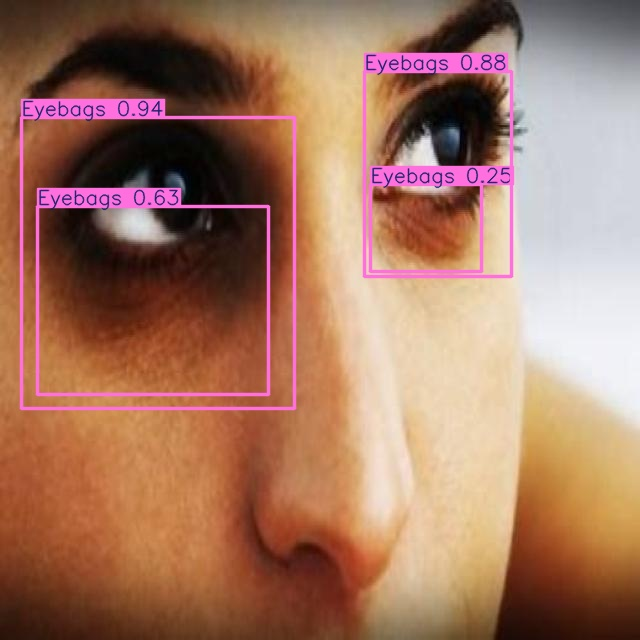

In [11]:
show_image("/content/runs/detect/predict/Image_109_jpg.rf.0c1d1df82df31435799163f56e800a3c.jpg")